In [44]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import notebook_helper
import sys
import numpy as np
import imodelsx
import imodelsx.process_results
import mprompt.data.data
from mprompt.data.data import TASKS_D3
# import mprompt.methods.m4_evaluate as m4_evaluate
import warnings
import scipy.stats
def sem(x):
    '''Compute standard error of the mean, ignoring NaNs
    '''
    with warnings.catch_warnings():
        return scipy.stats.sem(x, ddof=0)
tqdm.pandas()
TASK_NAMES = list(TASKS_D3.keys())
sys.path.append('../experiments/')
results_dir = '/home/chansingh/mprompt/results/may10' # maps to results_synthetic_llm_sweep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# r = imodelsx.process_results.get_results_df(results_dir, use_cached=False)
# r = imodelsx.process_results.fill_missing_args_with_default(r, experiment_filename='01_explain.py')
# r = notebook_helper.process_and_add_scores(r, add_bert_scores=True)
# r.to_pickle(join('../results', 'results_synthetic_llm_sweep.pkl'))
r = pd.read_pickle(join('../results', 'results_synthetic_llm_sweep.pkl'))

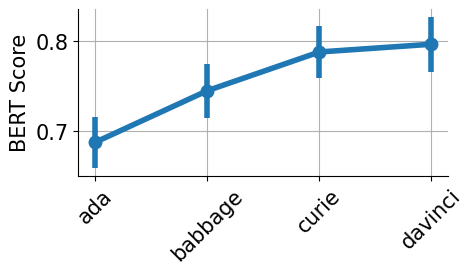

In [48]:
plt.figure(figsize=(5, 3))
rg = r.groupby('checkpoint')['any_bert']
plt.errorbar(rg.mean().index.map(lambda x: x.split('-')[1]), rg.mean(), yerr=rg.apply(sem), lw=4, marker='o', markersize=9)
plt.grid()

# rg = r.groupby('checkpoint')['top_score_synthetic']
# plt.errorbar(rg.mean().index.map(lambda x: x.replace('text-', '')), rg.mean(), yerr=rg.apply(sem))
plt.xticks(rotation=45)
plt.ylabel('BERT Score')
plt.savefig('../results/synth_vary_llm.pdf', bbox_inches='tight')
plt.show()